TTTT Analysis
======
This Notebook is simply a playground to examine the resulting histograms from the main TTTT analysis executable.

In [1]:
import ROOT
from IPython.display import display, display_markdown
%load_ext autoreload
%autoreload 2
import random
from utils import ResultSet
from utils import clear, show_event, show_value, show_function, normalize_columns, CANVAS, PDG

Welcome to JupyROOT 6.08/02


First, we need to load the pre-processed datafiles. These will generally contain a set of histograms of various quantities calculated from data in the input MiniTrees. However, they can also contain things besides histograms. For example, C++ STL containers can be serialized to the ROOT file to save things such as counters or even "raw" event information.

In [2]:
rs_TTZ = ResultSet("TTZ", "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
rs_TTW = ResultSet("TTW", "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root")
rs_TTTT = ResultSet("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root")

Running analysis for sample:  TTZ
Writing log data to ../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTW
Writing log data to ../data/TTWToLNu_treeProducerSusyMultilepton_tree_result.log
Running analysis for sample:  TTTT
Writing log data to ../data/TTTT_ext_treeProducerSusyMultilepton_tree_result.log


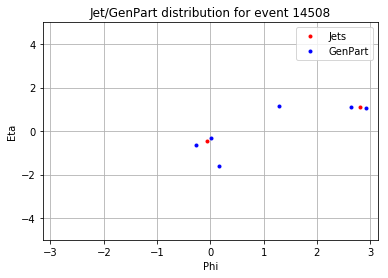

In [3]:
def plot_Jet_eta_phi(dataset, event_number = None):
    import matplotlib.pyplot as plt
    %matplotlib inline
    if event_number is None:
        event_number = random.randint(0,len(dataset.Jet_pt)-1)
    phis = list(dataset.Jet_phi[event_number])
    etas = list(dataset.Jet_eta[event_number])
    mc_phis = list(dataset.GenPart_phi[event_number])
    mc_etas = list(dataset.GenPart_eta[event_number])
    mc_ids = list(dataset.GenPart_pdgId[event_number])
    
    mc_phis,mc_etas = zip(*[(phi, eta) for phi, eta, pdgid in zip(mc_phis,mc_etas,mc_ids) if abs(pdgid) in {1,2,3,4,5,21}]) 
    
    plt.plot(phis,etas, 'r.', label='Jets')
    plt.plot(mc_phis,mc_etas, 'b.', label='GenPart')
    plt.xlim(-3.14159, 3.14159)
    plt.ylim(-5,5)
    plt.xlabel('Phi')
    plt.ylabel('Eta')
    plt.title("Jet/GenPart distribution for event {}".format(event_number))
    plt.grid()
    plt.legend()
    plt.show()
    
plot_Jet_eta_phi(rs_TTZ)

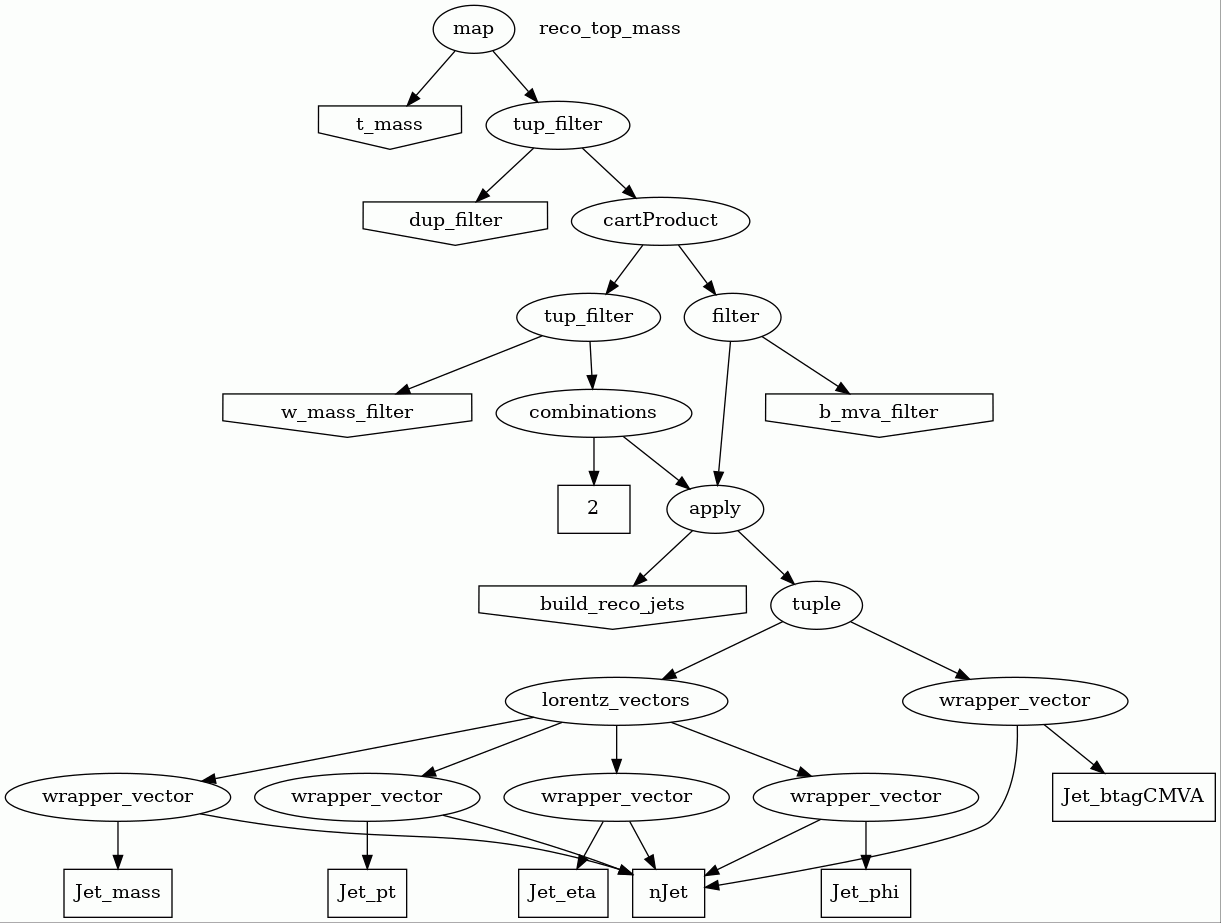

*t_mass*
-----
```cpp
([](const std::tuple<Jet, Jet> &w, const Jet &b) {
  return (std::get<0>(w).v + std::get<1>(w).v + b.v).M();
})

```

---
*dup_filter*
-----
```cpp
([](const std::tuple<Jet, Jet> &w, const Jet &b) {
  int j0 = b.idx;
  int j1 = std::get<0>(w).idx;
  int j2 = std::get<1>(w).idx;
  return (j0 != j1) && (j0 != j2) && (j1 != j2);
})

```

---
*w_mass_filter*
-----
```cpp
([ win_l = W_MASS - 10, win_h = W_MASS + 10 ](const Jet &j1, const Jet &j2) {
  float inv_mass = (j1.v + j2.v).M();
  return inv_mass > win_l && inv_mass < win_h;
})

```

---
*build_reco_jets*
-----
```cpp
([](const std::vector<TLorentzVector> &vs, const std::vector<float> &b_cmvas) {
  std::vector<Jet> jets;
  for (int i = 0; i < vs.size(); i++) {
    jets.push_back(Jet::reco(vs[i], i, b_cmvas[i]));
  }
  return jets;
})

```

---
*b_mva_filter*
-----
```cpp
([cut = 0.0](const Jet &j) { return j.b_cmva > cut; })

```

---
*build_reco_jets*
-----
```cpp
([](const std::vector<TLorentzVector> &vs, const std::vector<float> &b_cmvas) {
  std::vector<Jet> jets;
  for (int i = 0; i < vs.size(); i++) {
    jets.push_back(Jet::reco(vs[i], i, b_cmvas[i]));
  }
  return jets;
})

```

---

In [4]:
img, fns = show_value(rs_TTTT, 'reco_top_mass')
display(img)
display(fns)
# display(show_value(hists_TTTT.mc_top_mass))

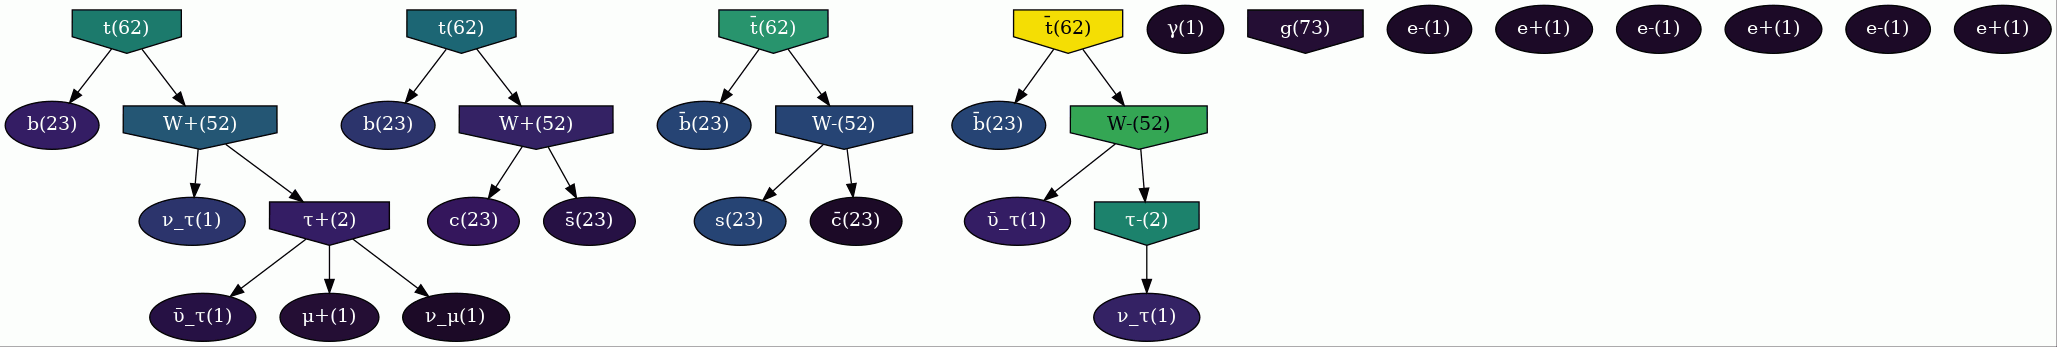

s   |b̄  |b̄  |g   |b   |g   |c   |s̄  |g   
0   |b   |b   |0   |b   |0   |s   |s   |0   
0   |t̄  |t̄  |0   |t   |0   |t̄  |t   |0   


In [6]:
n = 0
def to_str(vec):
    return '|'.join(map(lambda s: "{!s:<4s}".format(PDG.get(s,s)),vec))
print(to_str(rs_TTTT.Jet_mcFlavour[n]))
print(to_str(rs_TTTT.Jet_mcMatchFlav[n]))
print(to_str(rs_TTTT.Jet_mcMatchId[n]))
show_event(rs_TTTT, n)

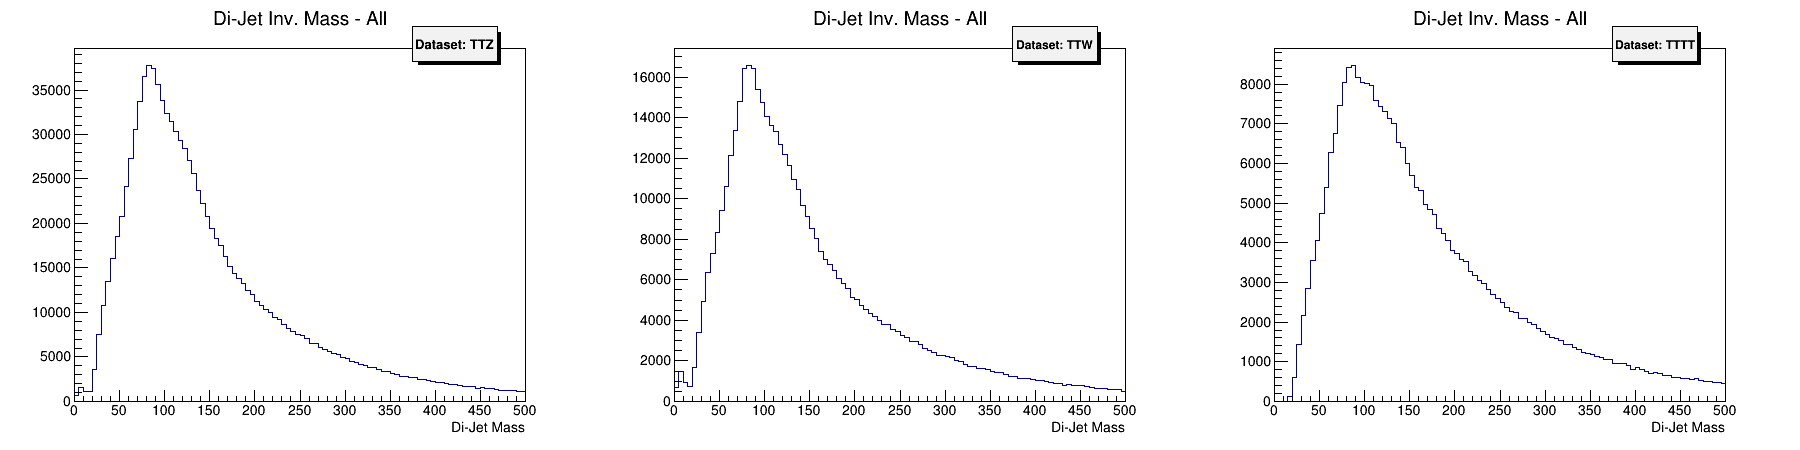

In [7]:
clear()
ResultSet.hist_array_single('dijet_inv_mass')
CANVAS.Draw()

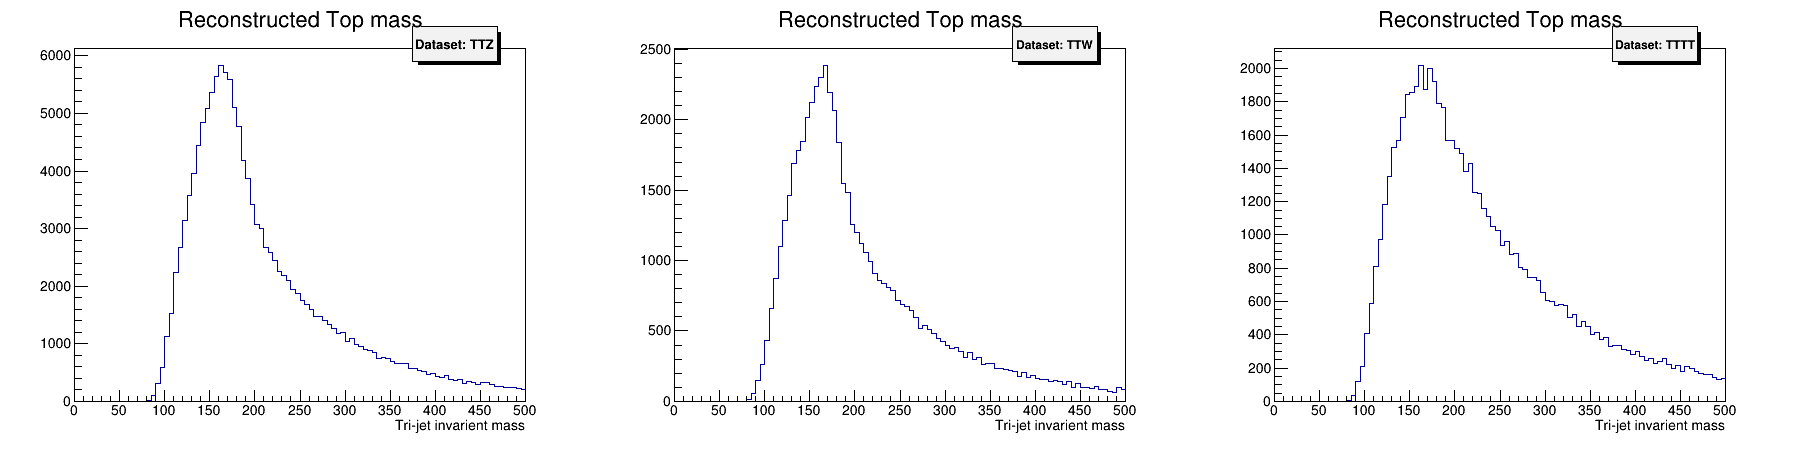

In [8]:
clear()
ResultSet.hist_array_single('reco_top_mass')
CANVAS.Draw()

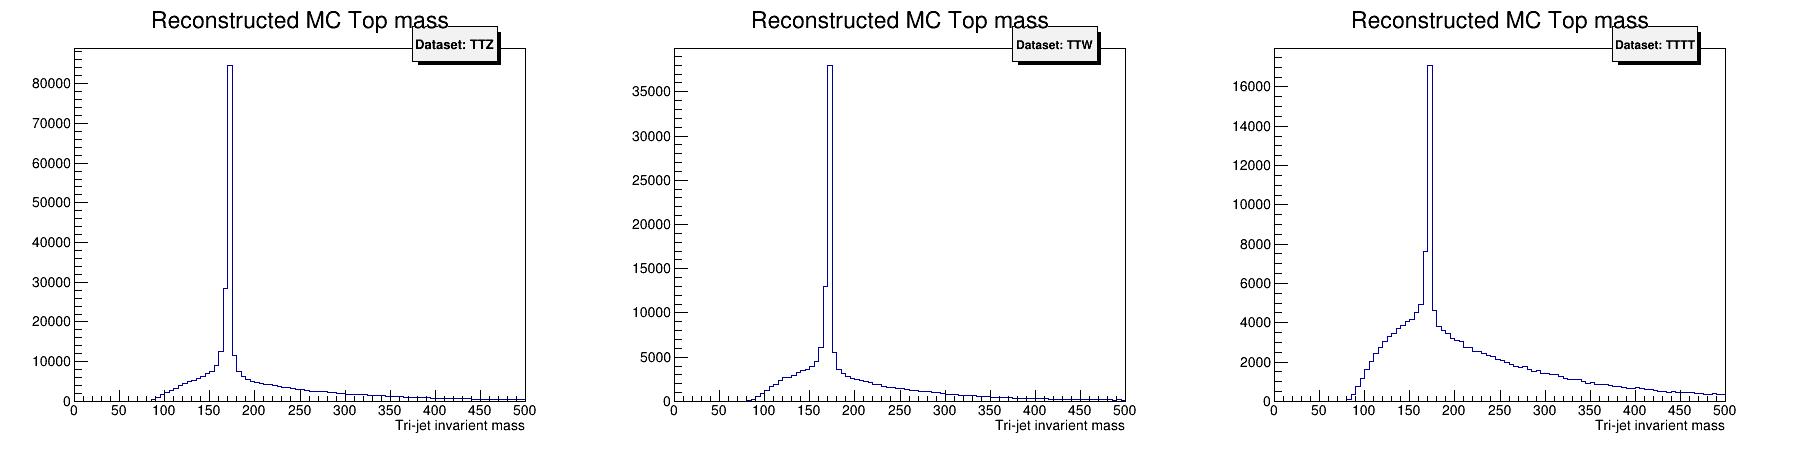

In [9]:
clear()
ResultSet.hist_array_single('mc_top_mass')
CANVAS.Draw()

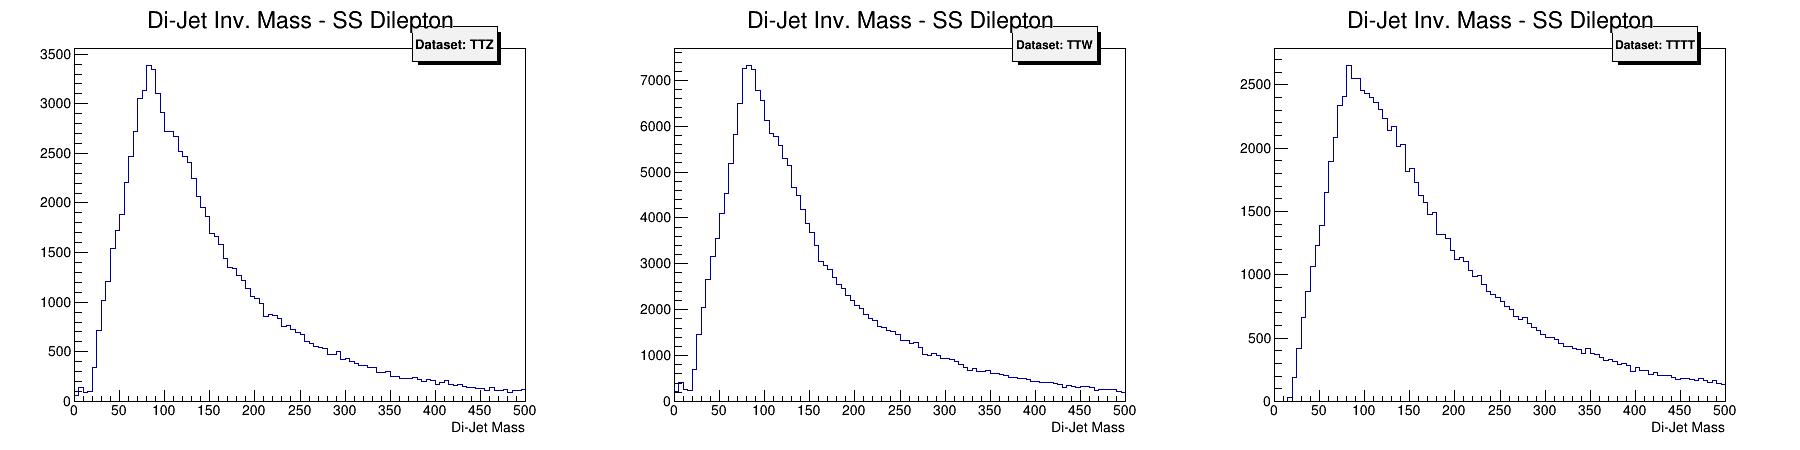

In [11]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_ssdilepton')
CANVAS.Draw()

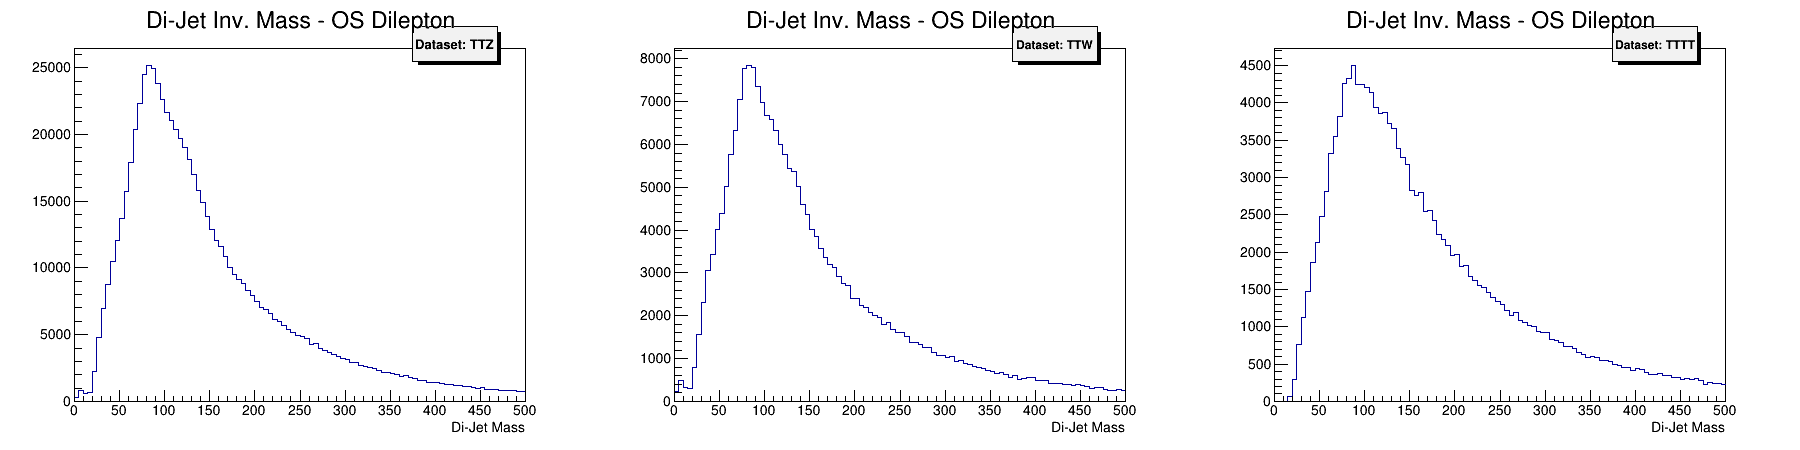

In [12]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_osdilepton')
CANVAS.Draw()

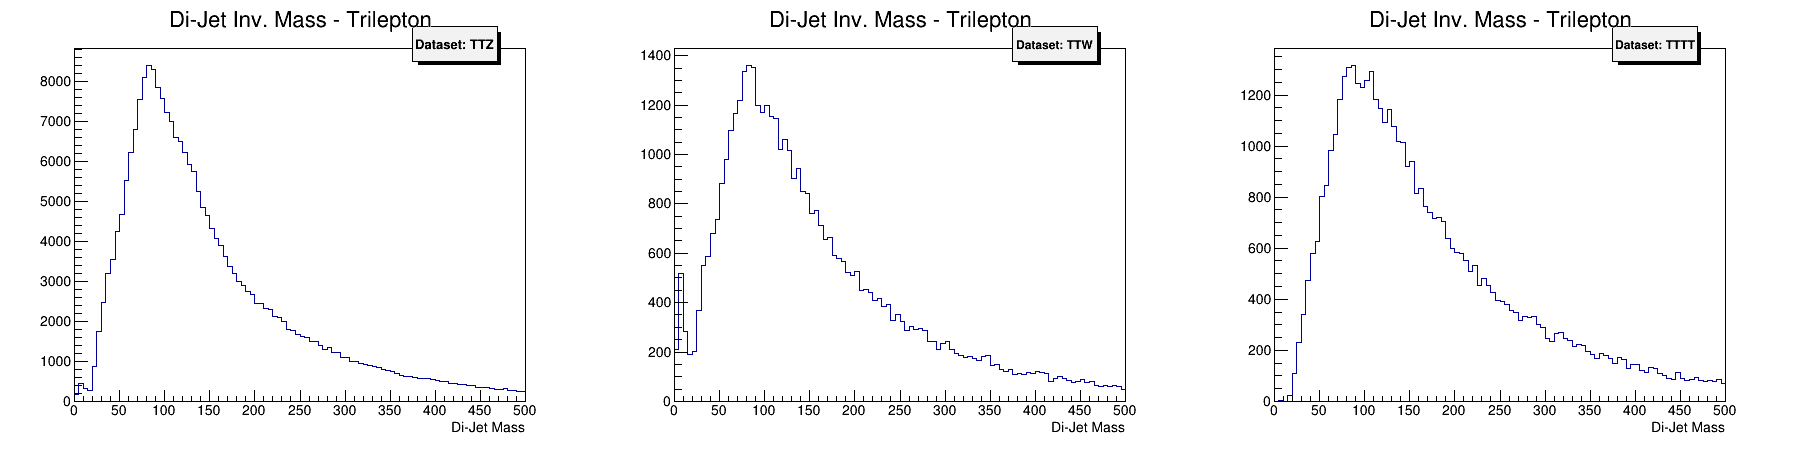

In [13]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_trilepton')
CANVAS.Draw()

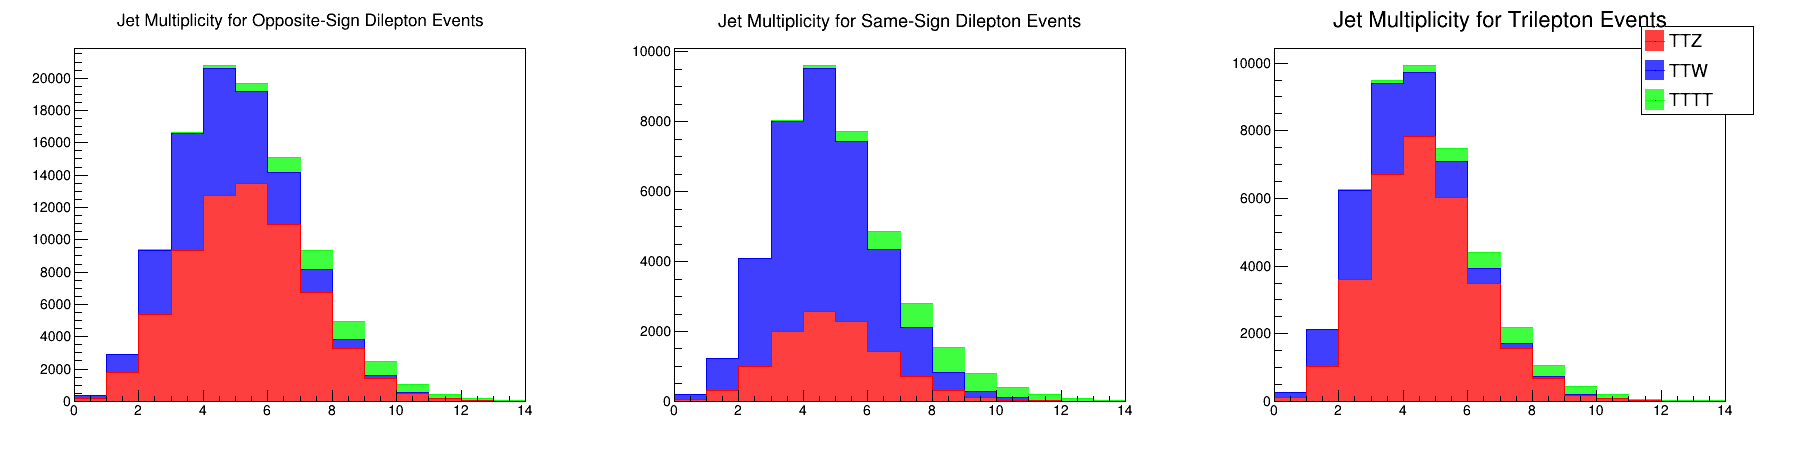

In [14]:
CANVAS.Clear()
ResultSet.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                                ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                                ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                               ),
                           normalize_to=0,
                           enable_fill=True,
                           shape=(3,1),
                          )
CANVAS.Draw()

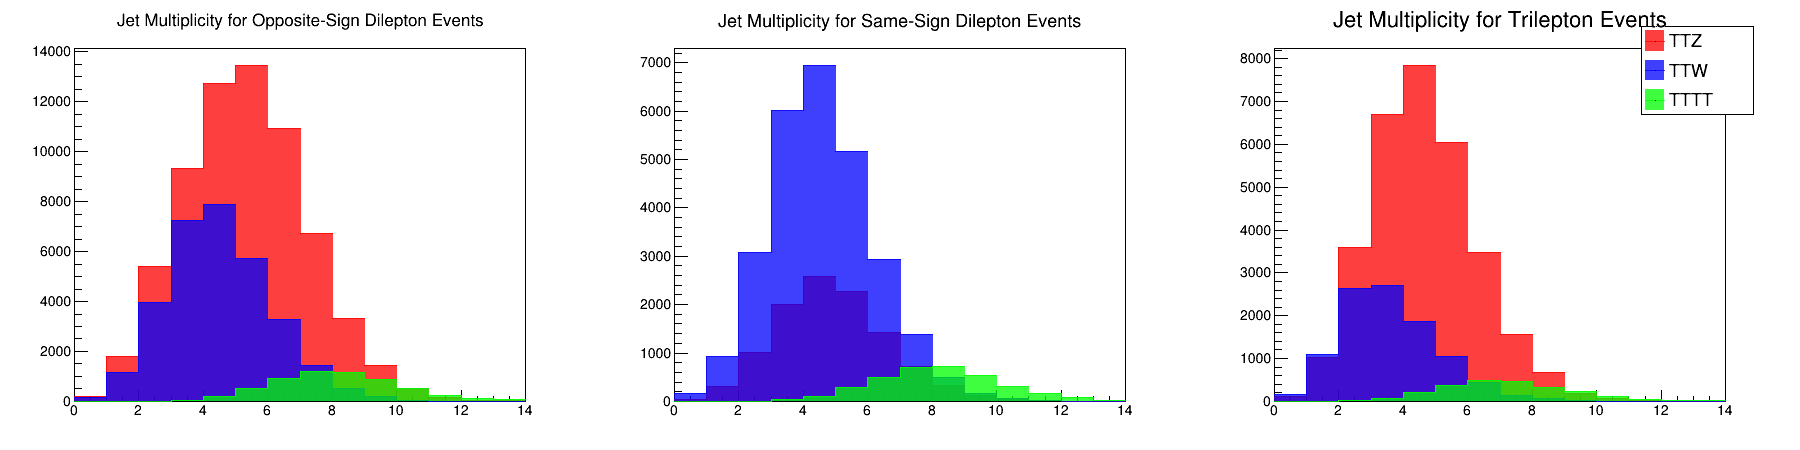

In [15]:
CANVAS.Clear()
ResultSet.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                                ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                                ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                               ),
                           normalize_to=0,
                           enable_fill=True,
                           shape=(3,1),
                           draw_option='nostack',
                          )
CANVAS.Draw()

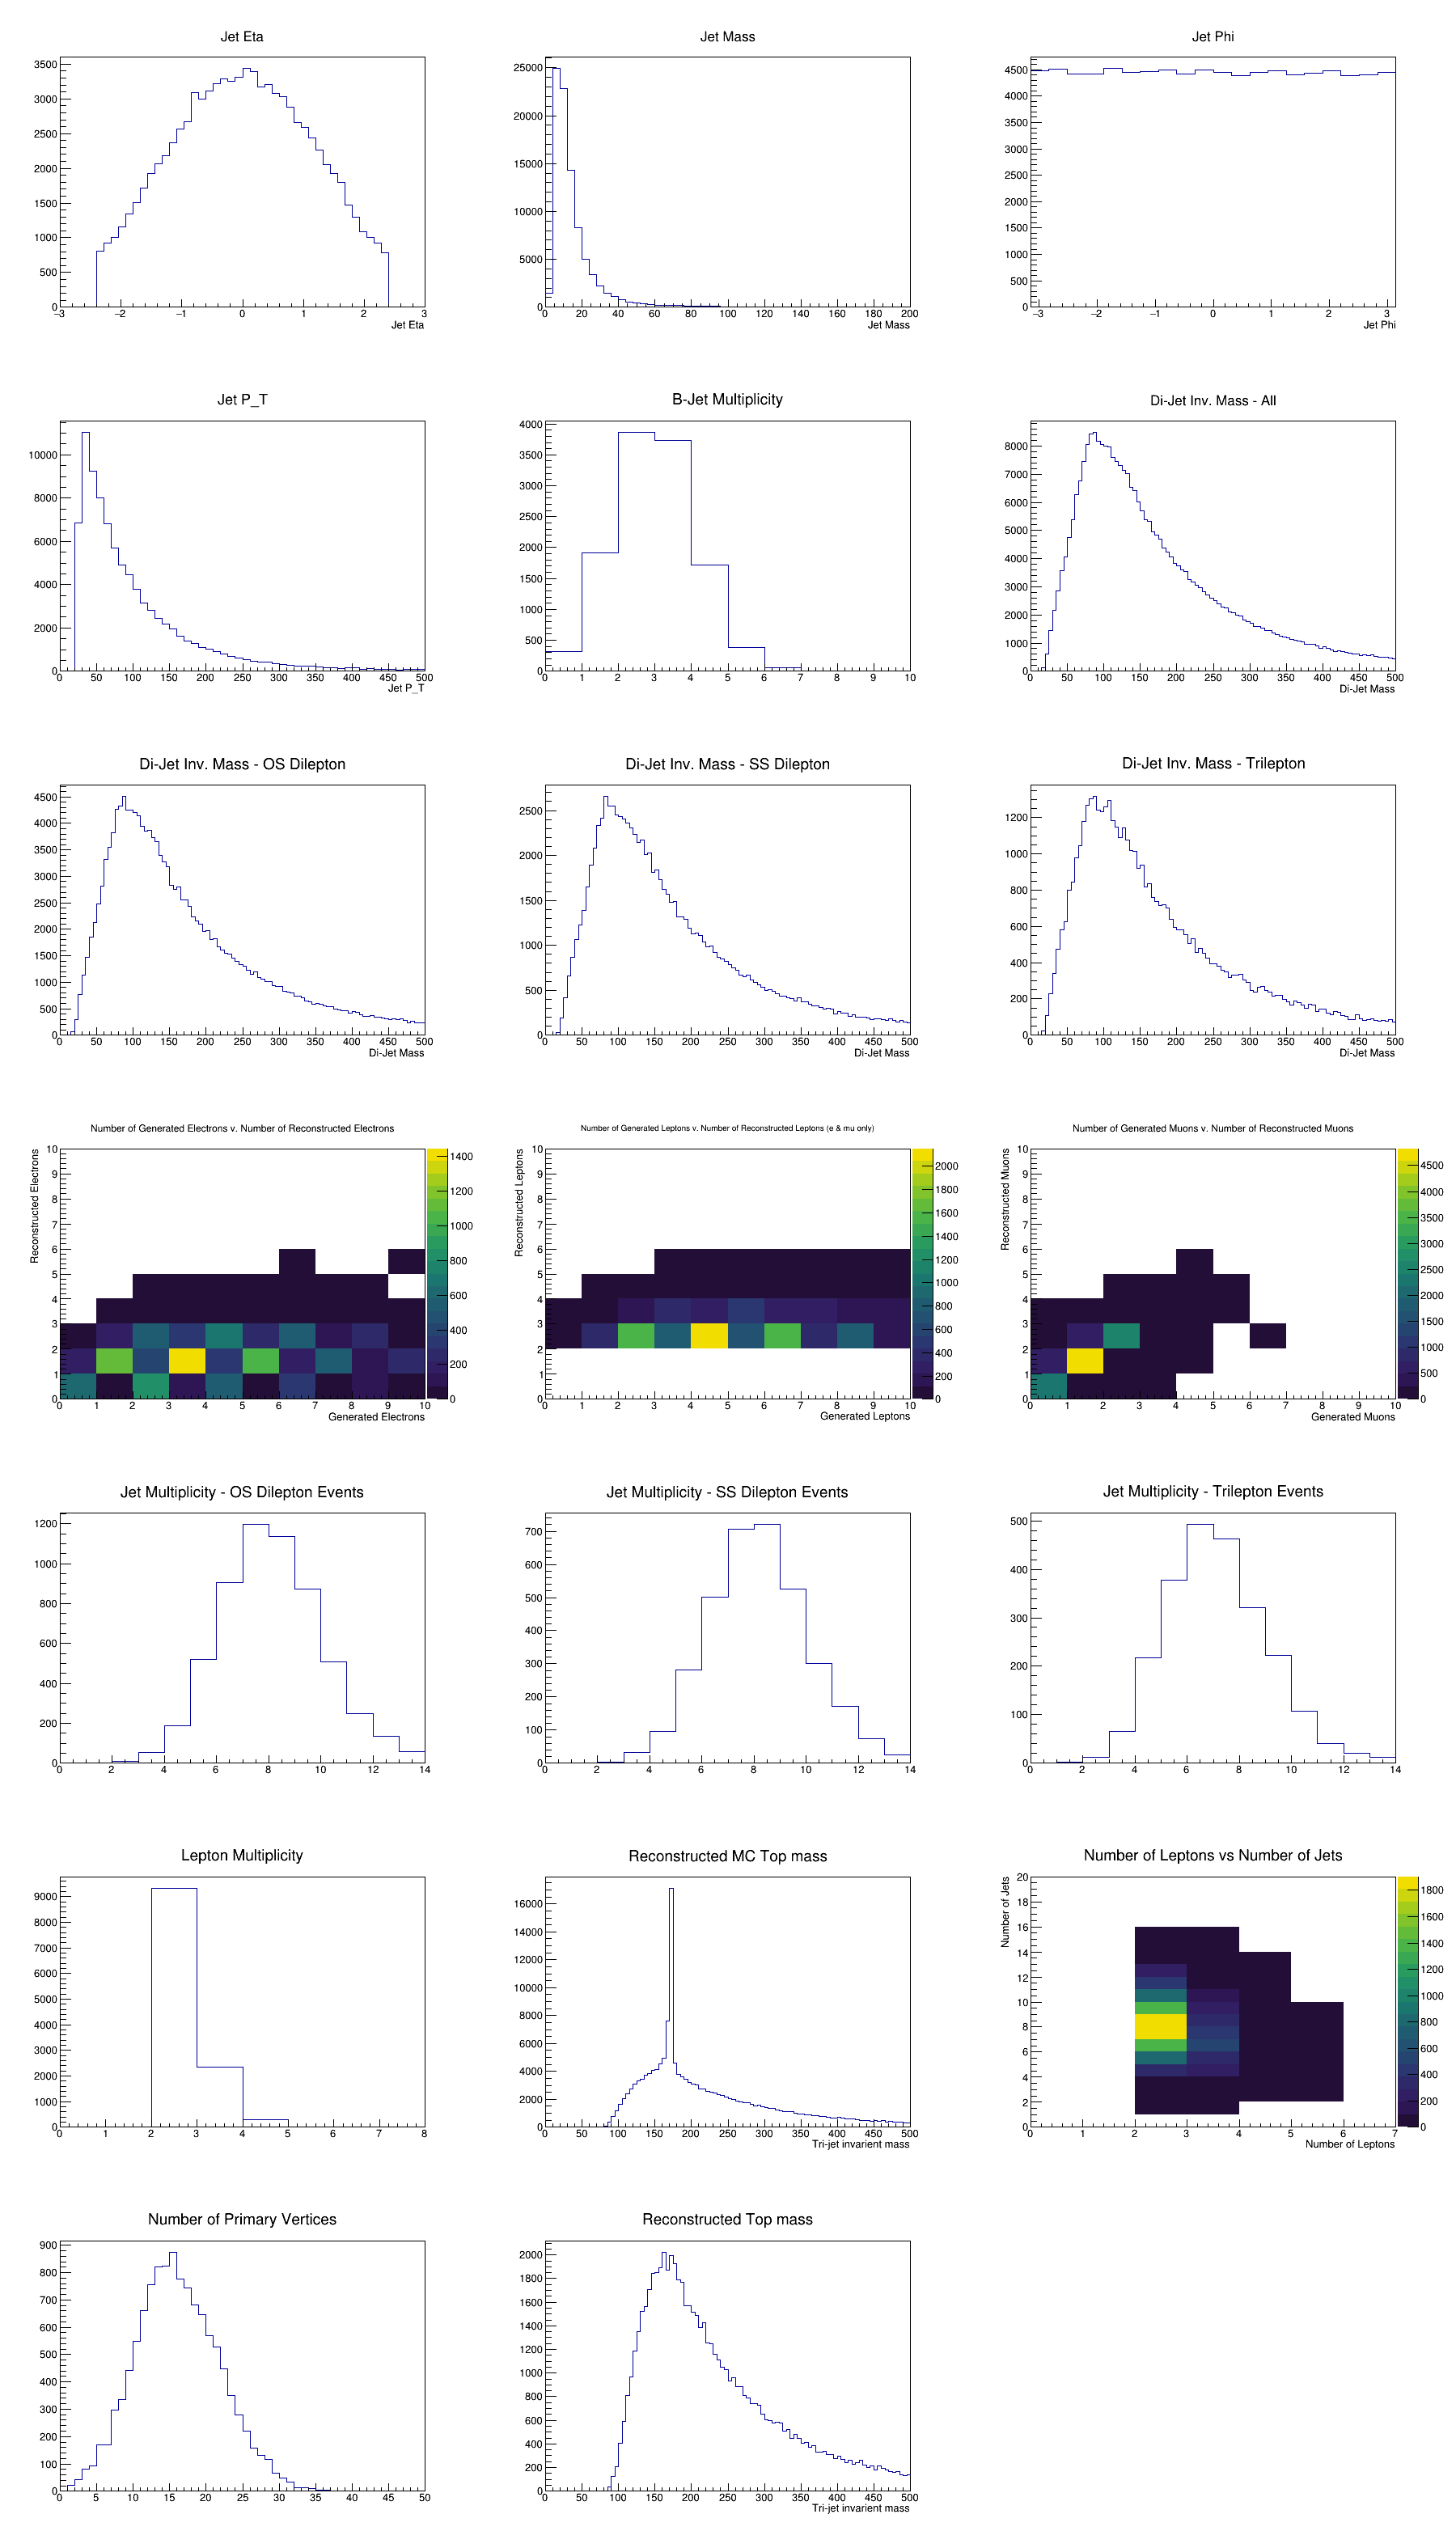

In [16]:
rs_TTTT.draw()

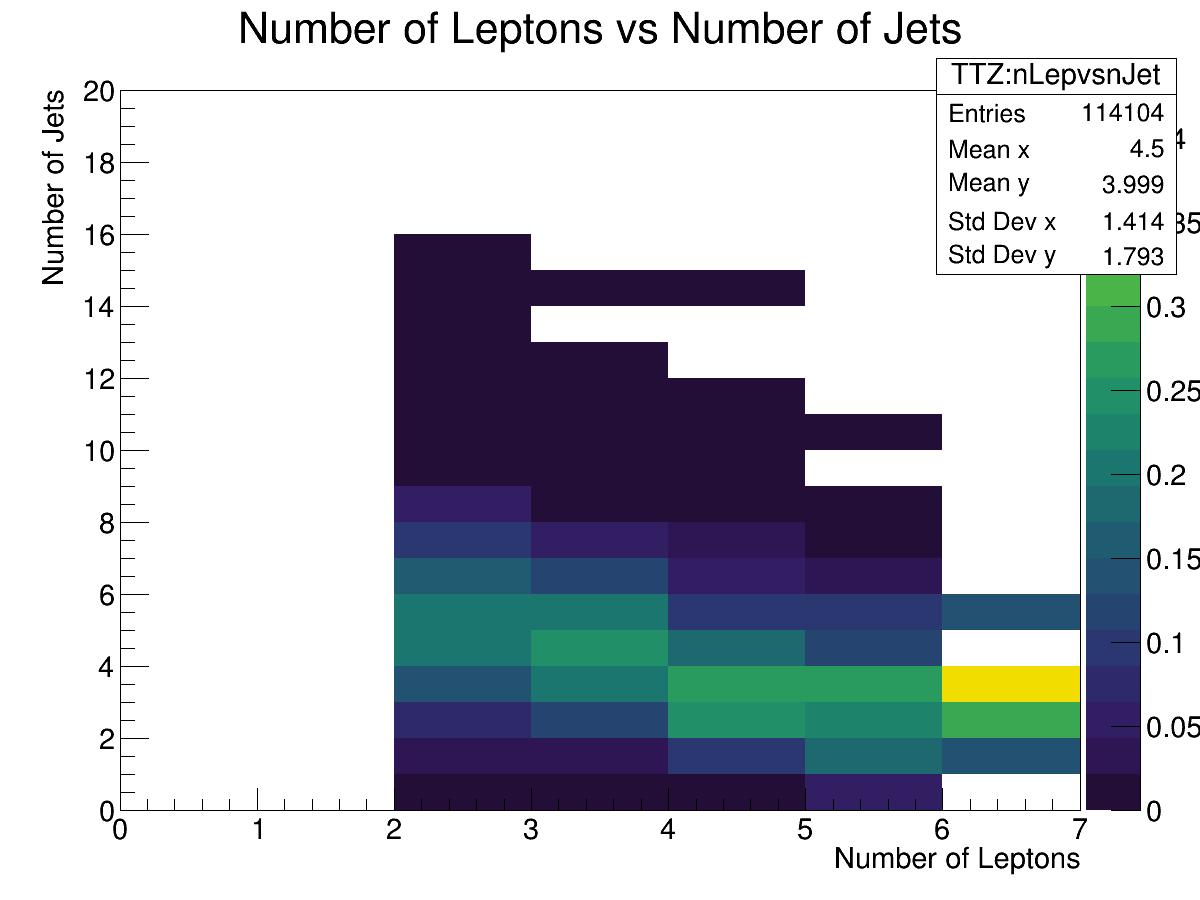

In [19]:
rs_TTTT.nLepvsnJet_norm = normalize_columns(rs_TTTT.nLepvsnJet)
rs_TTZ.nLepvsnJet_norm = normalize_columns(rs_TTZ.nLepvsnJet)
rs_TTW.nLepvsnJet_norm = normalize_columns(rs_TTW.nLepvsnJet)
clear()
rs_TTZ.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

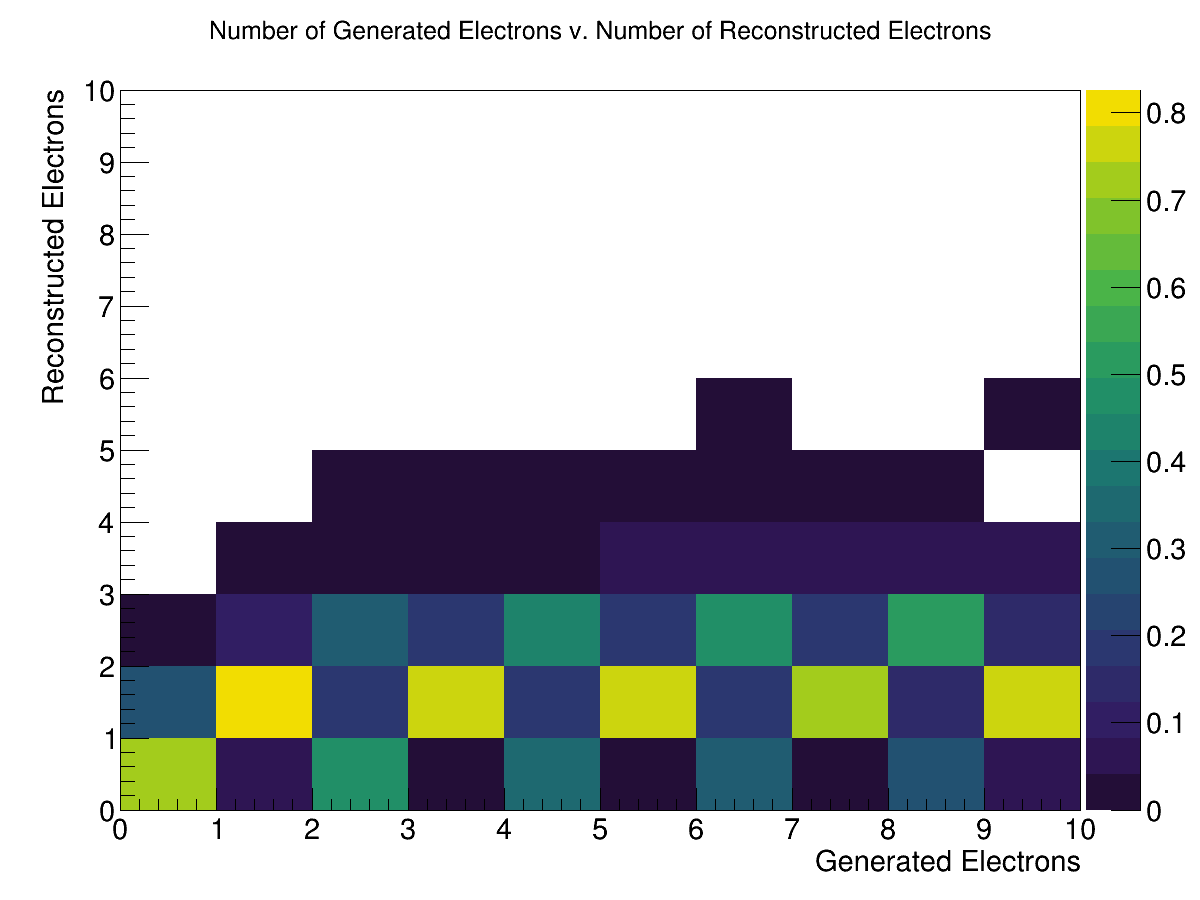

In [20]:
rs_TTTT.nLepvsnJet_norm = normalize_columns(rs_TTTT.genEle_count_v_recEle_count)
rs_TTZ.nLepvsnJet_norm = normalize_columns(rs_TTZ.genEle_count_v_recEle_count)
rs_TTW.nLepvsnJet_norm = normalize_columns(rs_TTW.genEle_count_v_recEle_count)
clear()
rs_TTTT.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

In [22]:
event_number = int(random.uniform(0,100))
TTZ_event = show_event(rs_TTZ, event_number)
TTW_event = show_event(rs_TTW, event_number)
TTTT_event = show_event(rs_TTTT, event_number)

We can use the `show_event` function to look at the Generator-Level particles for the event. They are color-coded based on their pt relative to the maximum pt of a particles in the event. Darker is lower, greener/lighter is higher. The following are the particle trees for event #{{event_number}} in each dataset.
  - TTZ Generator-Level Particles
{{TTZ_event}}
-----------------------------------------
  - TTW Generator-Level Particles
{{TTW_event}}
-----------------------------------------
  - TTTT Generator-Level Particles
{{TTTT_event}}

<ROOT.THStack object ("lepton_count_stack") at 0x18a159c0>

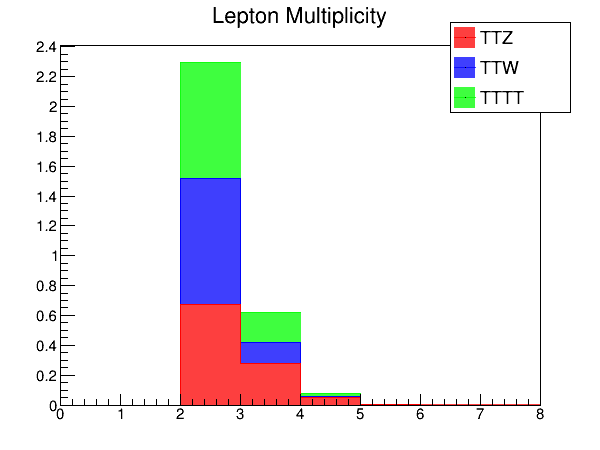

In [23]:
ResultSet.stack_hist("lepton_count", title="Lepton Multiplicity",
                     enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("b_jet_count_stack") at 0x17f6b240>

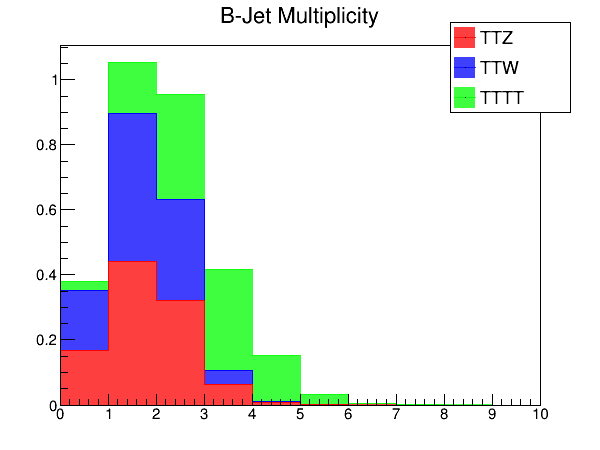

In [24]:
ResultSet.stack_hist("b_jet_count", title="B-Jet Multiplicity",
                     enable_fill=True, normalize_to=1, make_legend=True, draw=True)

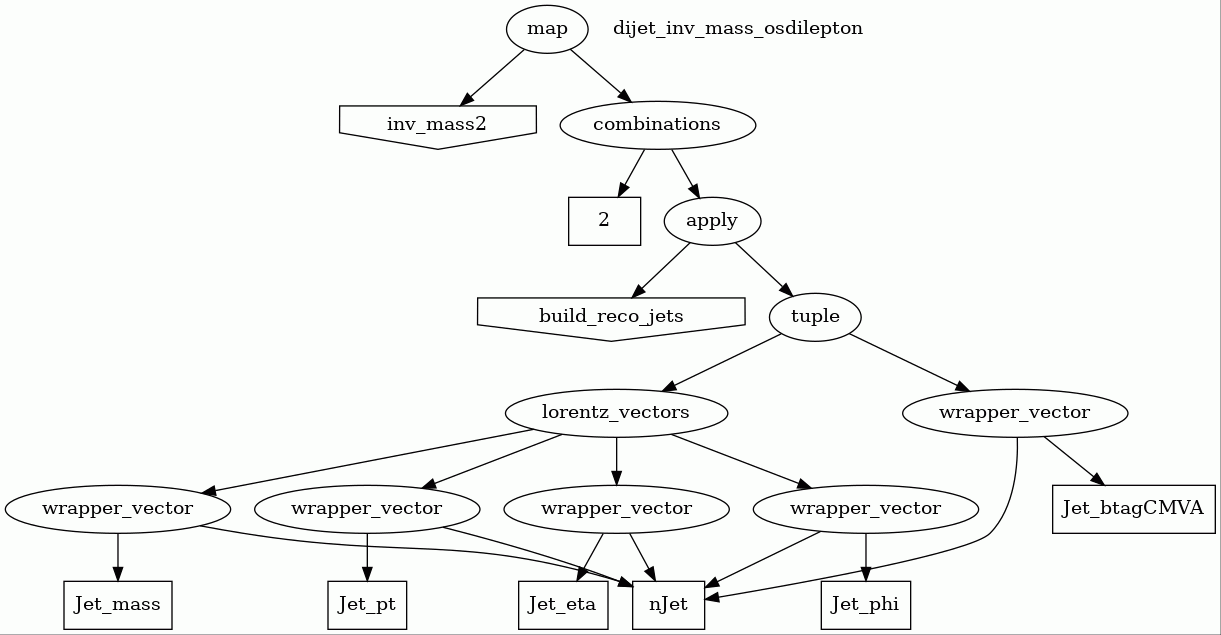

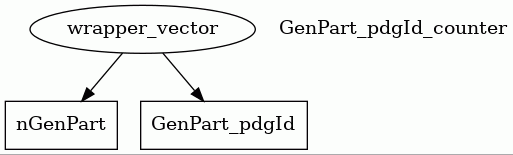

In [26]:
display(show_value(rs_TTTT, rs_TTTT.dijet_inv_mass_osdilepton)[0])
display(show_value(rs_TTTT, "GenPart_pdgId_counter")[0])